In [1]:
niter = 10

In [2]:
%autoreload 2
import ajcs
import sqra
import optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nx = 8
ny = 8

U = np.zeros((ny,nx))
s = sqra.sqra2d(U)

adjacency2d is deprecated, use adjacency_nbox


In [4]:
nt = 3
dt = 1
ts = ([dt] * nt)

o=optim.SqraOptim(s, ts, penalty = 0.001, nonautonomous=True)

In [5]:
U_p = U.copy()
U_p[:,4] = 2
s_p = sqra.sqra2d(U_p)

adjacency2d is deprecated, use adjacency_nbox


&lt;matplotlib.image.AxesImage at 0x1203a3880&gt;

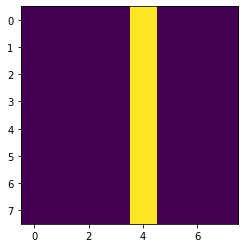

In [6]:
plt.imshow(s_p.u)

In [7]:
o_p=optim.SqraOptim(s_p, ts, penalty = 0.0001)

In [8]:
U_h = U.copy()
U_h[:,2] = np.inf
U_h[2,2] = 0
s_h = sqra.sqra2d(U_h, phi=10)

adjacency2d is deprecated, use adjacency_nbox


In [9]:
o_h=optim.SqraOptim(s_h, ts, penalty = 0.001)

# Experimental

In [10]:
%connect_info

{
  &quot;shell_port&quot;: 9007,
  &quot;iopub_port&quot;: 9009,
  &quot;stdin_port&quot;: 9008,
  &quot;control_port&quot;: 9006,
  &quot;hb_port&quot;: 9005,
  &quot;ip&quot;: &quot;127.0.0.1&quot;,
  &quot;key&quot;: &quot;9b63a25f-2487-4f6e-a220-50b38021fee5&quot;,
  &quot;transport&quot;: &quot;tcp&quot;,
  &quot;signature_scheme&quot;: &quot;hmac-sha256&quot;,
  &quot;kernel_name&quot;: &quot;&quot;
}

Paste the above JSON into a file, and connect with:
    $&gt; jupyter &lt;app&gt; --existing &lt;file&gt;
or, if you are local, you can connect with just:
    $&gt; jupyter &lt;app&gt; --existing /var/folders/f1/lgdx8nc94yg_11x4fhdkpck00000gn/T/tmp-9044zmDvFp6bcGkk.json
or even just:
    $&gt; jupyter &lt;app&gt; --existing
if this is the most recent Jupyter kernel you have started.


In [11]:
import ode
Qs = [s_p.Q] * 3
us = [s_p.u] * 3
dts = [1,1,5]
hpa = ode.finite_time_hitting_prob_adjoint(Qs, dts, us, nquad=100)

In [12]:
hp1 = hpa.finite_time_hitting_probs()

In [13]:
hp2 = ode.finite_time_hitting_probs(Qs, dts)
np.max(np.abs(hp1-hp2))

3.766282030692736e-08

&lt;matplotlib.colorbar.Colorbar at 0x122512a90&gt;

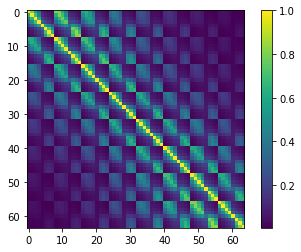

In [14]:
plt.imshow(hp1)
plt.colorbar()

In [15]:
o, du = hpa.min_and_derivative()
o

0.004262475748093813

In [16]:
hpa.activei, hpa.activej

AttributeError: &#39;finite_time_hitting_prob_adjoint&#39; object has no attribute &#39;activei&#39;

&lt;matplotlib.colorbar.Colorbar at 0x122627790&gt;

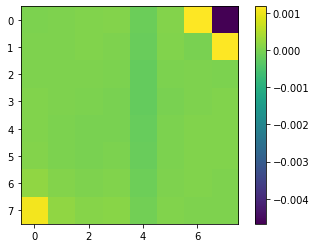

In [17]:
plt.imshow(du.reshape(ny,nx))
plt.colorbar()

In [18]:
sp = s_p.perturbed_copy(np.zeros(25))

ValueError: cannot reshape array of size 25 into shape (8,8)

In [19]:
ap = ode.finite_time_hitting_prob_adjoint([sp.Q]*3, dts, [sp.u]*3, nquad=100)

NameError: name &#39;sp&#39; is not defined

In [20]:
for i in range(10):
    ap = ode.finite_time_hitting_prob_adjoint([sp.Q]*3, dts, [sp.u]*3, nquad =100)
    m, d = ap.min_and_derivative()
    sp = sp.perturbed_copy(d*-1)
    print(m)
    plt.imshow(d.reshape((5,5)))
    plt.imshow(sp.u - s_p.u)

plt.colorbar()


NameError: name &#39;sp&#39; is not defined

In [36]:
import ode
problem = ode.Problem(s_p, [5], g0=0.1, optimizer=optimizers.Rprop())
problem.hpmin

hp:0.0008603005062473544, cost:0.0, obj:0.0008603005062473544


0.0008603005062473544

In [39]:
problem.optim.run(10)

hp:0.0008603005062473544, cost:0.0, obj:0.0008603005062473544
hp:0.0003221578617582934, cost:0.00064, obj:-0.00031784213824170664
hp:0.00040397632752334244, cost:0.00035400000000000004, obj:4.99763275233424e-05
hp:0.0006340890758569218, cost:0.000133, obj:0.0005010890758569218
hp:0.0005711722663856901, cost:0.00020075000000000005, obj:0.00037042226638569
hp:0.0007710257758781487, cost:0.00014747000000000005, obj:0.0006235557758781487
hp:0.0009322850493896998, cost:0.00019794000000000002, obj:0.0007343450493896998
hp:0.0008269797613963936, cost:0.00018831500000000007, obj:0.0006386647613963935
hp:0.0010345983537026794, cost:0.00018448400000000009, obj:0.0008501143537026794
hp:0.001176847838968895, cost:0.00016895220000000003, obj:0.001007895638968895


In [574]:
problems = [ode.Problem(s_p, [5], g0=g) for g in [1, 0.1, 0.01]]
for p in problems:
    p.rprop.x = (np.random.rand(ny*nx))


In [ ]:
for p in problems:
    p.run(10)
    print("DONE")


In [561]:
[p.hpmin for p in problems]

[0.0012194295220462597,
 0.0011861143051992912,
 0.0011307235484760317,
 0.0011974975509639438,
 0.0011867188168923706,
 0.001074915032599125]

In [564]:
[p.cost for p in problems]

[0.000214946360448768,
 0.0002373354857360916,
 0.0002124011077314048,
 0.00023379796573716477,
 0.00023561601416399996,
 0.00018036927962501148]

In [563]:
[np.mean(p.rprop.g) for p in problems]

[0.016405029921599996,
 0.009646006558631036,
 0.012948037971839996,
 0.006821758704383997,
 0.013608943356374997,
 0.028797060688741615]